In [1]:
import cv2
import numpy
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import tensorflow as tf
from keras import applications
from keras.layers import GlobalAveragePooling2D,Dropout , Dense 
from keras.models import Model
from keras.models import load_model

C:\Users\Dell\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [21]:
#On charge les modèles et l'image requête dans ce bloc 
img1 = cv2.imread("C:/Users/Dell/Desktop/Voiture.jpg",cv2.IMREAD_GRAYSCALE)
nbreLogoFord = 659
nbreLogoDacia = 363
imgSize = 64
modelFord = load_model('fordModel.h5')
modelDacia = load_model('daciaModel.h5')

In [13]:
sift = cv2.xfeatures2d.SIFT_create()
bf = cv2.BFMatcher(cv2.NORM_L1,crossCheck=True)
imgSize = 64
#On calcule les descripteurs pour l'image requête
kp1 , des1 = sift.detectAndCompute(img1 , None)

In [14]:
#C'est la fonction qui se charge de la prédiction et qui retourne un array qui contient la probabilité d'atteindre chaque modèle qui correspond un label et qui est son indice dans le tableau
def predict(model , image):
    newImage = cv2.resize(image , (imgSize , imgSize))
    newImage = np.array(newImage).reshape(-1,imgSize,imgSize,1)
    newImage = tf.keras.utils.normalize(newImage, axis=1)
    ynew = model.predict(newImage)
    return ynew

classe  Ford c-max, avec une probabilitée de  0.99981004 😀
classe  Ford Fusion, avec une probabilitée de  0.00010383952 
classe  Ford Kuga, avec une probabilitée de  4.7758596e-05 
classe  Ford focus, avec une probabilitée de  2.7190548e-05 
classe  Ford Fiesta, avec une probabilitée de  1.2844413e-06 
classe  Ford Ecosprt, avec une probabilitée de  1.3458244e-07 


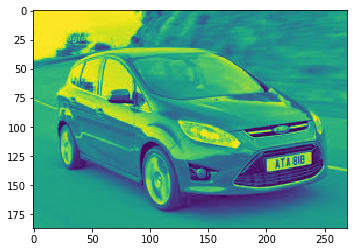

In [24]:
#Dans ce bloc on charge les descripteurs offline et on mesure la similarité au fur et à mesure une fois qu'on trouve 
#un match de plus de 30 points d'intérêts avec une distance < 20, on appelle le modèle correspondant
#sinon on appelle le modèle qu'on appelé backup qui s'est entraîné par toute les classes 
test = 0   
with open('C:/Users/Dell/Desktop/Liste de descripteurs dacia/fileDes' , 'rb') as file1:
    with open('C:/Users/Dell/Desktop/Liste de descripteurs dacia/fileKp', 'rb') as file2:
        unPicklerKp = pickle.Unpickler(file2)
        unPickerDes = pickle.Unpickler(file1)
        for i in range(0,nbreLogoDacia):
            kp2 = []
            des2 = unPickerDes.load()
            liste = unPicklerKp.load()
            for point in liste:
                kp2.append(cv2.KeyPoint(x=point[0][0],y=point[0][1],_size=point[1], _angle=point[2], 
                           _response=point[3], _octave=point[4], _class_id=point[5]))
            #liste11.append(des2)
            #liste12.append(kp2)
            if (des2 is None):
                continue
            matches = bf.match(des1,des2)
            matches = sorted(matches , key = lambda x:x.distance)
            distanceMin = 200
            cpt = 0 
            for d in matches:
                if(d.distance<20 and cpt<30):
                    cpt +=1
                else:
                    break
        
            if(cpt>30):
                DATADIR = "C:/Users/Dell/Desktop/Dacia"
                listDir  = os.listdir(DATADIR)
                #this is for making the input image accurate
                CATEGORIES = []
                for category in listDir:
                    CATEGORIES.append(category)
                imgSize = 64
                plt.imshow(img1)
                
                ynew = predict(modelDacia , img1)

                cpt2 = 0
                for j in range(0,len(CATEGORIES)):
                    for k in range (0,len(CATEGORIES)-1):
                        if(ynew[0][k]<ynew[0][k+1]):
                            temp = ynew[0][k]
                            ynew[0][k] = ynew[0][k+1]
                            ynew[0][k+1] = temp
                            temp = CATEGORIES[k]
                            CATEGORIES[k] = CATEGORIES[k+1]
                            CATEGORIES[k+1] = temp
                for category in CATEGORIES:
                    print("classe Dacia  %s, avec une probabilitée de %s"%(category,ynew[0][cpt2]))
                    cpt2+=1
                test+=1
                break
                            
                """print("yeaaaaaaaaah dacia")
                matching_result = cv2.drawMatches(img1, kp1, img2, kp2, matches[:cpt], None)
                matching_result =cv2.resize(matching_result ,(100,100))
                cv2.imshow("Matching result" , matching_result)
                cv2.waitKey(0)
                cv2.destroyAllWindows()
                test +=1
                break
                """

if (test==0):
    with open('C:/Users/Dell/Desktop/Liste de descripteurs ford/fileDes', 'rb') as file1:
        with open('C:/Users/Dell/Desktop/Liste de descripteurs ford/fileKp', 'rb') as file2:
            unPicklerKp = pickle.Unpickler(file2)
            unPickerDes = pickle.Unpickler(file1)
            for i in range(0,nbreLogoFord):
                kp2 = []
                des2 = unPickerDes.load()
                liste = unPicklerKp.load()
                for point in liste:
                    kp2.append(cv2.KeyPoint(x=point[0][0],y=point[0][1],_size=point[1], _angle=point[2], 
                               _response=point[3], _octave=point[4], _class_id=point[5]))
                #liste11.append(des2)
                #liste12.append(kp2)
                if (des2 is None):
                    continue
                matches = bf.match(des1,des2)
                matches = sorted(matches , key = lambda x:x.distance)
                distanceMin = 200
                cpt = 0
                for d in matches:
                    if(d.distance<20 and cpt<30):
                        cpt +=1
                    else:
                        break
                
                if(cpt>30):
                    DATADIR = "C:/Users/Dell/Desktop/Ford"
                    listDir  = os.listdir(DATADIR)
                    #this is for making the input image accurate
                    CATEGORIES = []
                    for category in listDir:
                        CATEGORIES.append(category)

                    imgSize = 64
                    plt.imshow(img1)
                    
                    ynew = predict(modelFord , img1)

                    cpt2 = 0
                    for j in range(0,len(CATEGORIES)):
                        for k in range (0,len(CATEGORIES)-1):
                            if(ynew[0][k]<ynew[0][k+1]):
                                temp = ynew[0][k]
                                ynew[0][k] = ynew[0][k+1]
                                ynew[0][k+1] = temp
                                temp = CATEGORIES[k]
                                CATEGORIES[k] = CATEGORIES[k+1]
                                CATEGORIES[k+1] = temp
                    for category in CATEGORIES:
                        if(cpt2==0):
                            print("classe Ford %s, avec une probabilitée de  %s \U0001f600"%(category,ynew[0][cpt2]))
                        else:
                            print("classe Ford %s, avec une probabilitée de  %s" %(category,ynew[0][cpt2]))
                        cpt2+=1
                    test+=1
                    break
if(test==0) :
    CATEGORIES = ["Ford c-max", "Dacia Docker" , "Dacia Duster" , "Ford Ecosprt" , "Ford Fiesta" , "Ford focus" , "Ford Kuga" ,
              "Ford Fusion", "Dacia Lodgy" , "Dacia Logan" , "Dacia Sandero Ambiance" ,"Dacia Sandero Stepway"] 
    imgSize = 64
    model = load_model('modelBackup.h5')
    image = cv2.imread("C:/Users/Dell/Desktop/Voiture.jpg",cv2.IMREAD_GRAYSCALE)
    plt.imshow(image)
    ynew = predict(model , image)
    cpt2 = 0

    for j in range(0,len(CATEGORIES)):
        for k in range (0,len(CATEGORIES)-1):
            if(ynew[0][k]<ynew[0][k+1]):
                temp = ynew[0][k]
                ynew[0][k] = ynew[0][k+1]
                ynew[0][k+1] = temp
                temp = CATEGORIES[k]
                CATEGORIES[k] = CATEGORIES[k+1]
                CATEGORIES[k+1] = temp
    for category in CATEGORIES:
        if(cpt2==0):
            print("classe  %s, avec une probabilitée de  %s \U0001f600"%(category,ynew[0][cpt2]))
            marque = category[:4]
        elif category[:4]==marque:
            print("classe  %s, avec une probabilitée de  %s " %(category,ynew[0][cpt2]))
        cpt2+=1